# __Data Modelling Approach__

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection and Cleaning__

* __Step 3: Data Understanding__
    
* __Step 4: RFM Modelling__
    
* __Step 5: find out the customers who are 'champions', 'Potential customers' and 'need attention__

* __Step 6: Exploratory Data Analysis__

* __Step 7: K-Means Clustering Technique__

## __Step 1: Importing the Relevant Libraries__ 

In [1]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as ss


## __Step 2: Data Inspection and Cleaning__

In [4]:
data = pd.read_excel("../input/sales-data/sales_data.xlsx")
data.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [5]:
data.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,...,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,...,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,...,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,...,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,...,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,...,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


In [6]:
data.shape

(5000, 40)

* __We have 5000 rows and 40 columns__

In [7]:
data.isna().sum()

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

* __NO missing values present in data and this is a clean dataset.__

## __Step 3: Data Understanding__

In [8]:
AVG_Daily_Orders = [data[['MONDAY_ORDERS','TUESDAY_ORDERS','WEDNESDAY_ORDERS','THURSDAY_ORDERS','FRIDAY_ORDERS','SATURDAY_ORDERS','SUNDAY_ORDERS']].mean()]
AVG_Daily_Revenue = [data[['MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE','THURSDAY_REVENUE','FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE']].mean()]

In [9]:
AVG_Daily_Orders, AVG_Daily_Revenue

([MONDAY_ORDERS       1.6290
  TUESDAY_ORDERS      1.7544
  WEDNESDAY_ORDERS    1.7980
  THURSDAY_ORDERS     2.1340
  FRIDAY_ORDERS       1.9462
  SATURDAY_ORDERS     1.6834
  SUNDAY_ORDERS       1.9254
  dtype: float64],
 [MONDAY_REVENUE       215.208336
  TUESDAY_REVENUE      233.510430
  WEDNESDAY_REVENUE    235.689294
  THURSDAY_REVENUE     265.949796
  FRIDAY_REVENUE       250.580554
  SATURDAY_REVENUE     219.642100
  SUNDAY_REVENUE       260.943330
  dtype: float64])

#### *__According to the data above, Thursday, Friday, and Sunday have higher daily average customer orders than other days. Additionally, the average revenue generated on these days is higher than on other days.__*


In [10]:
AVG_Weekly_Orders = [data[['WEEK1_DAY01_DAY07_ORDERS','WEEK2_DAY08_DAY15_ORDERS','WEEK3_DAY16_DAY23_ORDERS','WEEK4_DAY24_DAY31_ORDERS']].mean()]
AVG_Weekely_Revenue = [data[['WEEK1_DAY01_DAY07_REVENUE','WEEK2_DAY08_DAY15_REVENUE','WEEK3_DAY16_DAY23_REVENUE','WEEK4_DAY24_DAY31_REVENUE']].mean()]

In [11]:
AVG_Weekly_Orders, AVG_Weekely_Revenue

([WEEK1_DAY01_DAY07_ORDERS    2.9978
  WEEK2_DAY08_DAY15_ORDERS    3.0626
  WEEK3_DAY16_DAY23_ORDERS    3.2300
  WEEK4_DAY24_DAY31_ORDERS    3.5800
  dtype: float64],
 [WEEK1_DAY01_DAY07_REVENUE    378.638346
  WEEK2_DAY08_DAY15_REVENUE    406.595734
  WEEK3_DAY16_DAY23_REVENUE    421.826908
  WEEK4_DAY24_DAY31_REVENUE    474.462852
  dtype: float64])

#### *__According to the graph above, average revenue and orders increase from week 1 to week 4, and most customers prefer to buy products in the last week of the month.__*


## __Step 4: RFM Modeling Technique :__
---
__Here we will calculate the Recency, Frequency and Monetary for the customers and those are defined as ;__   
* __Recency : How much time has elapsed since a customer's last activity or transaction with the brand? i.e DAYSSINCELASTORDER__    
* __Frequency : How often has a customer transacted or interacted? i.e. TOTAL_ORDERS__
* __Monetary : How much a customer has spent with the brand during a particular period of time? i.e.REVENUE__
    
    __Therefore, We need DAYSSINCELASTORDER, TOTAL_ORDERS and  REVENUE columns to do RFM Modelling.__

In [12]:
#RFM factors calculation:
#converting the names of the columns
RFM_data = data.rename(columns = {'DAYSSINCELASTORDER' : 'Recency',
                          'TOTAL_ORDERS' : "Frequency",
                          'REVENUE' : "Monetary"},inplace = False)
RFM_data.head()

,CustomerID,Frequency,Monetary,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,Recency,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [13]:
RFM_data_1 = RFM_data[['CustomerID','Recency','Frequency','Monetary']]

In [14]:
RFM_data_1.head()

,CustomerID,Recency,Frequency,Monetary
0,22,1,124,11986.54
1,29,1,82,11025.96
2,83,1,43,7259.69
3,95,1,44,6992.27
4,124,1,55,6263.44


In [15]:
# RFM_data Description/ Summary
RFM_data_1.iloc[:,1:4].describe()

,Recency,Frequency,Monetary
count,5000.000000,5000.00000,5000.000000
mean,87.420000,12.87040,1681.523840
std,80.156513,12.67988,1998.618678
min,1.000000,1.00000,38.500000
25%,7.000000,3.00000,315.097500
50%,68.000000,8.00000,966.725000
75%,171.250000,20.00000,2493.072500
max,207.000000,156.00000,34847.400000


##### *__From above result, we can observe that average recency of the  customers are 87 days (approx), an average customer are purchasing the product 13 times and spending an average 1681.52 unitprice.__*

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

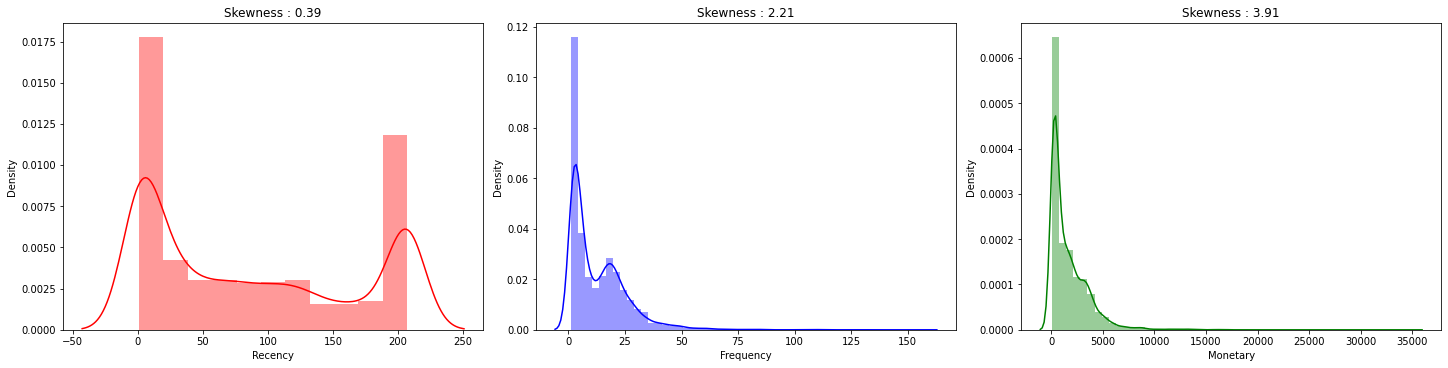

In [16]:
#Visualizing the Recency, Frequency and Monetary distributions.
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(RFM_data_1.columns[1:4]):
    plt.subplot(gs[0,i])
    sns.distplot(RFM_data_1[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(RFM_data_1[var].skew(),2).astype(str))
    i= i+1

##### *__From above distribution plots we can observe that all of these three metrics are positively skewed or right skewed. And also as per skewness coefficient values indicating same.__*

### __Segmentation :__

In [17]:
#Here, we will divide the data set into 4 parts based on the quantiles.
quantiles = RFM_data_1.drop('CustomerID',axis = 1).quantile(q = [0.33,0.67])
quantiles.to_dict()

{'Recency': {0.33: 19.0, 0.67: 128.0},
 'Frequency': {0.33: 4.0, 0.67: 17.0},
 'Monetary': {0.33: 427.09400000000005, 0.67: 1905.1959}}

In [18]:
#Creating the R,F and M scoring/segement function
#[1] Recency scoring (Negative Impact : Higher the value, less valuable)
def R_score(var,p,d):
    if var <= d[p][0.33]:
        return 1
    elif var <= d[p][0.67]:
        return 2
    else:
        return 3
#[2] Frequency and Monetary (Positive Impact : Higher the value, better the customer)
def FM_score(var,p,d):
    if var <= d[p][0.33]:
        return 3
    elif var <= d[p][0.67]:
        return 2
    else:
        return 1


#Scoring:
RFM_data_1['R_score'] = RFM_data_1['Recency'].apply(R_score,args = ('Recency',quantiles,))
RFM_data_1['F_score'] = RFM_data_1['Frequency'].apply(FM_score,args = ('Frequency',quantiles,))
RFM_data_1['M_score'] = RFM_data_1['Monetary'].apply(FM_score,args = ('Monetary',quantiles,))
RFM_data_1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,22,1,124,11986.54,1,1,1
1,29,1,82,11025.96,1,1,1
2,83,1,43,7259.69,1,1,1
3,95,1,44,6992.27,1,1,1
4,124,1,55,6263.44,1,1,1


In [19]:
#Now we will create : RFMGroup and RFMScore
RFM_data_1['RFM_Group'] = RFM_data_1['R_score'].astype(str) + RFM_data_1['F_score'].astype(str) + RFM_data_1['M_score'].astype(str)

#Score
RFM_data_1['RFM_Score'] = RFM_data_1[['R_score','F_score','M_score']].sum(axis = 1)
RFM_data_1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score
0,22,1,124,11986.54,1,1,1,111,3
1,29,1,82,11025.96,1,1,1,111,3
2,83,1,43,7259.69,1,1,1,111,3
3,95,1,44,6992.27,1,1,1,111,3
4,124,1,55,6263.44,1,1,1,111,3


*__RFM Scores have been calculated now we will use this score to make segments of the customers and define level of loyality.__*

## __Step 5: find out the customers who are 'champions', 'Potential customers' and 'need attention'__

In [20]:
#Creating the Customer segments/ Loyality_level
Segment = ['champions','Potential customers','need attention']
cuts = pd.qcut(RFM_data_1['RFM_Score'],q = 3,labels=Segment)
RFM_data_1['Segment'] = cuts.values
RFM_data_1.tail(15)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,Segment
4985,173166,207,3,118.68,3,3,3,333,9,need attention
4986,173176,207,4,118.59,3,3,3,333,9,need attention
4987,173219,207,1,118.49,3,3,3,333,9,need attention
4988,173315,207,1,118.49,3,3,3,333,9,need attention
4989,173503,207,2,118.08,3,3,3,333,9,need attention
4990,173766,207,4,117.79,3,3,3,333,9,need attention
4991,173792,207,1,117.59,3,3,3,333,9,need attention
4992,173842,207,1,117.49,3,3,3,333,9,need attention
4993,173857,207,1,117.49,3,3,3,333,9,need attention
4994,173944,207,1,117.49,3,3,3,333,9,need attention


*__We have classified our customer into four segments based on their R,F and M scores.__*

## __Step 6: Exploratory Data Analysis__

#### *__Visualization for Recency, Frequency and Monetory : RFM_Segment__*

#### __1.Recency V/s Frequency__

In [21]:

fig = px.scatter(RFM_data_1,x = "Recency", y = "Frequency",color = "Segment")
fig.show()

#### *__We can see the customers whose Recency is less than two month have high Frequency i.e the customers buying more when their recency is less.__*

#### __2.Frequency V/s Monetary__

In [22]:

fig = px.scatter(RFM_data_1,x = "Monetary", y = "Frequency",color = "Segment")
fig.show()

#### *__We can see, customers buying frequently are spending less amount.__*

#### __3. Recency V/s Monetary__ 

In [23]:
fig = px.scatter(RFM_data_1,x = "Recency", y = "Monetary",color = "Segment")
fig.show()

#### *__We can see the customers whose Recency is less than two month have high Monetory i.e the customers spending more when their recency is less.__*

#### __4. RFM_Segment__ 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Segment', ylabel='count'>

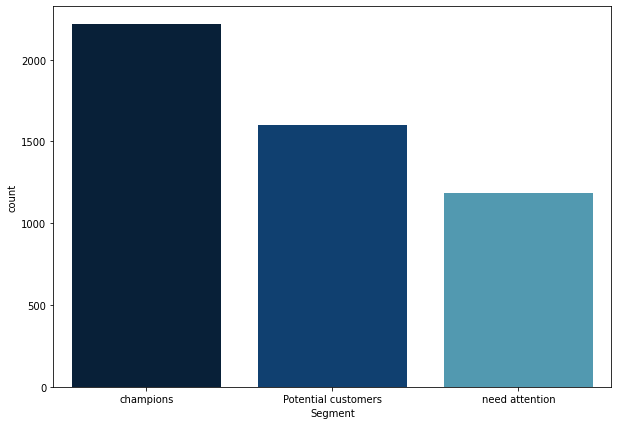

In [24]:
plt.figure(figsize=(10,7))
sns.countplot('Segment',data=RFM_data_1,palette='ocean')

#### *__From Above chart It is clear that almost 50% customers are spend time and buy products and  around 25-30% customers are potential customers and 20-25% customers need attention.__*

## __Step 7: K-Means Clustering Technique :__

### __How the K-means algorithm works ?__
---
__Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.__  
    
__To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids.__

*__To create the customer segementation based on the K-Means Clustering based on the R, F, and M Scores:
Before that we will bring them into same scale and normalise them.__*

In [25]:
# First will focus on the negativ and zero before the transformation.
def right_treat(var):
    if var <= 0:
        return 1
    else:
        return var

# Describing the data
RFM_data_1.describe()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,87.420000,12.87040,1681.523840,1.995400,2.047200,2.000000,6.042600
std,49949.848017,80.156513,12.67988,1998.618678,0.812595,0.817744,0.812485,1.880929
min,1.000000,1.000000,1.00000,38.500000,1.000000,1.000000,1.000000,3.000000
25%,1687.500000,7.000000,3.00000,315.097500,1.000000,1.000000,1.000000,4.000000
50%,13765.000000,68.000000,8.00000,966.725000,2.000000,2.000000,2.000000,6.000000
75%,71891.500000,171.250000,20.00000,2493.072500,3.000000,3.000000,3.000000,7.000000
max,277160.000000,207.000000,156.00000,34847.400000,3.000000,3.000000,3.000000,9.000000


*__From above we can see that there is no 0 values present in Frequency , Monetary and Recency.__*

In [26]:
#Applying on the data.
RFM_data_1['Recency'] = RFM_data_1['Recency'].apply(lambda x : right_treat(x))
RFM_data_1['Frequency'] = RFM_data_1['Frequency'].apply(lambda x : right_treat(x))
RFM_data_1['Monetary'] = RFM_data_1['Monetary'].apply(lambda x : right_treat(x))

#Checking the Skewness of R, F and M
print('Recency Skewness : ' + RFM_data_1['Recency'].skew().astype(str))
print('Frequency Skewness : ' + RFM_data_1['Frequency'].skew().astype(str))
print('Monetary Skewness : ' + RFM_data_1['Monetary'].skew().astype(str))

Recency Skewness : 0.390002913835805
Frequency Skewness : 2.205765054664766
Monetary Skewness : 3.9057746675131164


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

*__All the variables are right skewed, so will make log transformation of it.__*

In [27]:
#Log Transformation
log_RFM_data = RFM_data_1[['Recency','Frequency','Monetary']].apply(np.log,axis = 1).round(3)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



,Recency,Frequency,Monetary
count,5000.000000,5000.000000,5000.000000
mean,3.380851,2.041230,6.807619
std,2.008518,1.093141,1.173694
min,0.000000,0.000000,3.651000
25%,1.946000,1.099000,5.753000
50%,4.220000,2.079000,6.874000
75%,5.143250,2.996000,7.821250
max,5.333000,5.050000,10.459000


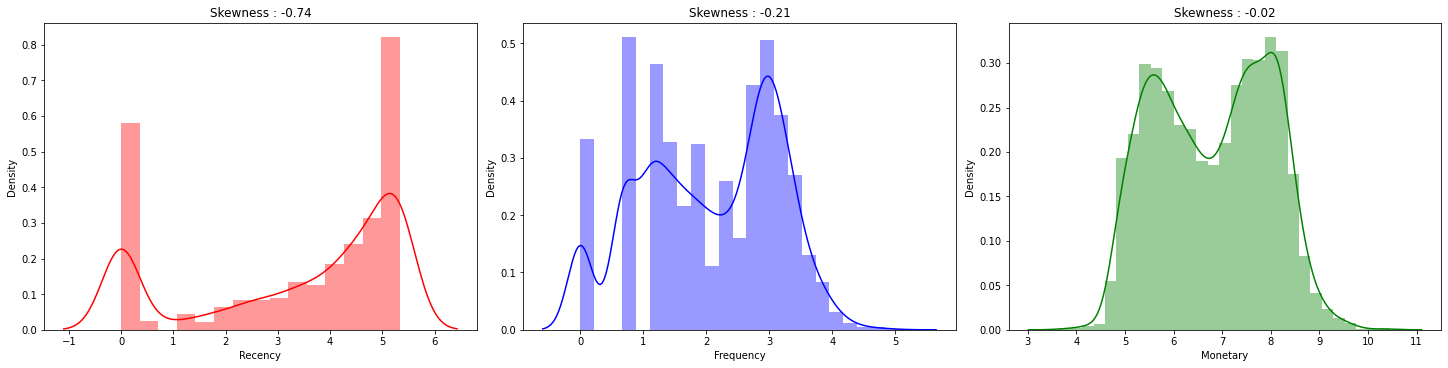

In [28]:
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(log_RFM_data.columns[0:3]):
    plt.subplot(gs[0,i])
    sns.distplot(log_RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(log_RFM_data[var].skew(),2).astype(str))
    i= i+1
log_RFM_data.describe()

*__Therefore all the variables are now approximately normally distributed. Will make all of them on the same scale as Monetary is little large in values.__*

In [29]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Scaled_RFM_data = ss.fit_transform(log_RFM_data)
Scaled_RFM_data = pd.DataFrame(Scaled_RFM_data,columns=log_RFM_data.columns,index=log_RFM_data.index)

Text(0.5, 1.0, 'Elbow Techinque to find the optimal cluster size')

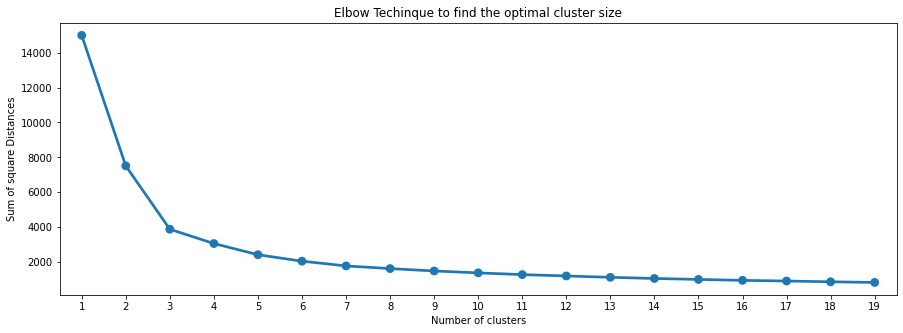

In [30]:
# Will search the optimal number of cluster based on the Elbow Method as below:
SS_distance = {}
for k in range(1,20):
    mod = KMeans(n_clusters= k, max_iter=1000,init = 'k-means++')
    mod = mod.fit(Scaled_RFM_data)
    SS_distance[k] = mod.inertia_

#Plotting the sum of square distance values and numbers of clusters
plt.figure(figsize = (15,5))
sns.pointplot(x = list(SS_distance.keys()), y = list(SS_distance.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square Distances")
plt.title("Elbow Techinque to find the optimal cluster size")

*__We can observe that as the number of cluster increases the sum of square distance are becoming lesser. And will take the count of cluster where this elbow is bending. In our cases, sum of square distance is dramatically decreasing at K = 3, so this is optimal value to choose for no of clusters.__*

In [31]:
# Now we will perform K- means clustering on the data set.
KM_clust = KMeans(n_clusters= 3, init = 'k-means++',max_iter = 1000)
KM_clust.fit(Scaled_RFM_data)

# Mapping on the data
RFM_data_1['Cluster'] = KM_clust.labels_
RFM_data_1['Cluster'] = 'Cluster' + RFM_data_1['Cluster'].astype(str)
RFM_data_1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,Segment,Cluster
0,22,1,124,11986.54,1,1,1,111,3,champions,Cluster1
1,29,1,82,11025.96,1,1,1,111,3,champions,Cluster1
2,83,1,43,7259.69,1,1,1,111,3,champions,Cluster1
3,95,1,44,6992.27,1,1,1,111,3,champions,Cluster1
4,124,1,55,6263.44,1,1,1,111,3,champions,Cluster1


*__Clusters have been created based on the values of recency, frequency and monetary with the help of K-Means Clustering.__*

### *__Visualization for Recency, Frequency and Monetory : Cluster Groups__*

In [32]:
# Recency V/s Frequency
fig = px.scatter(RFM_data_1,x = 'Recency',y = 'Frequency', color = 'Cluster')
fig.show()

# Frequency V/s Monetary
fig = px.scatter(RFM_data_1,x = 'Monetary',y = 'Frequency', color = 'Cluster')
fig.show()

# Recency V/s Monetary
fig = px.scatter(RFM_data_1,x = 'Recency',y = 'Monetary', color = 'Cluster')
fig.show()

## Step 8: Findings

* __1: Most of the customer orders placed during last week of the month__

    
* __2: Thursday, Friday, and Sunday are the most prominent days for customers to purchase products.__


* __3: average recency of the  customers are 87 days (approx), an average customer are purchasing the product 13 times and spending an average 1681.52 unitprice__
    
    
* __4: The customers whose Recency is less than two month have high Frequency i.e the customers buying more when their recency is less__
    
    
* __5: customers buying frequently are spending less amount.__


* __6: the customers whose Recency is less than two month have high Monetory i.e the customers spending more when their recency is less.__


* __7: almost 50% customers are spend time and buy products and  around 25-30% customers are potential customers and 20-25% customers need attention.__

## Step 8: Suggestions

 __I. Based on the above R-F-M score, we can give some Recommendations.__
* __1: Champions: We can Reward them for their multiples purchases. They can be early adopters to very new products. Suggest them “Refer a friend”. Also, they can be the most loyal customers that have the habit to order.__

    
* __2: Potential customers: Create loyalty cards in which they can gain points each time of purchasing and these points could transfer into a discount__


* __3: Need attention: Send them personalized emails/messages/notifications to encourage them to order. Also Notify them about the discounts to keep them spending more and more money on your products.__




__II. Based On the visualization of data :__

* __1. Allow discounts on products at the beginning of the month so that customers can start spending from week one..__

   
* __2. Take survey from need attention customers about service, offers and what they required from us.__
    

# THANK YOU...